### 例 2.1
### 利用犯罪嫌疑人的足长和步幅预测其身高。利用给定的足长、步幅和身高数据集，以足长、步幅为自变量，身高为因变量，采用二元线性回归获得预测身高的模型，对应的Python 代码如下:

In [1]:
# 导入必要的库
import numpy as np # 导入NumPy库，用于数值计算
import pandas as pd # 导入Pandas库，用于数据处理和分析
#import tensorflow as tf

In [ ]:
# 设置Pandas显示选项，使数据更易读
pd.set_option('display.max_rows', 500)
# 设置最大显示行数为500
pd.set_option('display.max_columns', 100)
 # 设置显示宽度为1000
pd.set_option('display.width', 1000)

# 导入警告模块并忽略所有警告
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#读取数据
# 读取Excel数据文件
df = pd.read_excel("身高预测参照表-1.xlsx")
# 打印前5行数据
print(df.head())

     足长  步幅          身高
0  21.0  60  157.266284
1  21.0  61  157.873103
2  21.0  62  158.389684
3  21.0  63  157.980905
4  21.0  64  159.769893


In [ ]:
df.columns = ['足长', '步幅', '身高'] # 重命名列

In [ ]:
print(df.head()) # Print the first 5 rows of the dataframe

     足长  步幅          身高
0  21.0  60  157.266284
1  21.0  61  157.873103
2  21.0  62  158.389684
3  21.0  63  157.980905
4  21.0  64  159.769893


In [ ]:
# 获取拆分后的数据x_data,y_data(其中x_data为数据集，y_data为标签）
# 定义函数用于提取特征和目标变量
def get_data(data):
    """
    从数据框中提取特征(足长和步幅)和目标变量(身高)

    参数:
        df: 包含足长、步幅和身高数据的DataFrame
    
    返回:
        x_data: 特征数据(足长和步幅)
        y_data: 目标变量(身高)
    """
    x_data = data.drop(columns=['身高'], axis=1) # 提取特征列
    y_data = data['身高'] # 提取目标变量列
    return x_data, y_data # 返回特征和目标变量

In [ ]:
# 调用函数获取特征和目标变量
x_data, y_data = get_data(df) # 获取数据
from sklearn.linear_model import LinearRegression # 导入线性回归模型

# 训练模型
lr = LinearRegression() # 创建线性回归模型
lr.fit(x_data, y_data) # 训练模型
y_pred = lr.predict(x_data) # 预测结果

print("权重：", lr.coef_) # 输出权重
print("截距：", lr.intercept_) # 输出截距
print(lr.score(x_data, y_data)) # 输出模型得分

权重： [3.17219931 0.3273639 ]
截距： 70.6111433169842
0.9830735216391343


In [ ]:
# 引入后面要用的库
import matplotlib.pyplot as plt # 导入matplotlib库中的pyplot模块
from mpl_toolkits.mplot3d import Axes3D  # 用Axes3D库画3D模型图 需要安装mpl_toolkits包

In [ ]:
# 创建单变量特征数据集(仅使用一个特征)
x1_data = x_data.drop(columns=['步幅'], axis=1) # 删除步幅列，仅保留足长特征
x2_data = x_data.drop(columns=['足长'], axis=1) # 删除足长列，仅保留步幅特征

In [ ]:
print(x1_data)  # 输出x1_data

        足长
0     21.0
1     21.0
2     21.0
3     21.0
4     21.0
...    ...
2695  28.4
2696  28.4
2697  28.4
2698  28.4
2699  28.4

[2700 rows x 1 columns]


In [ ]:
print(x2_data) # 打印x2_data

      步幅
0     60
1     61
2     62
3     63
4     64
...   ..
2695  91
2696  92
2697  93
2698  94
2699  95

[2700 rows x 1 columns]


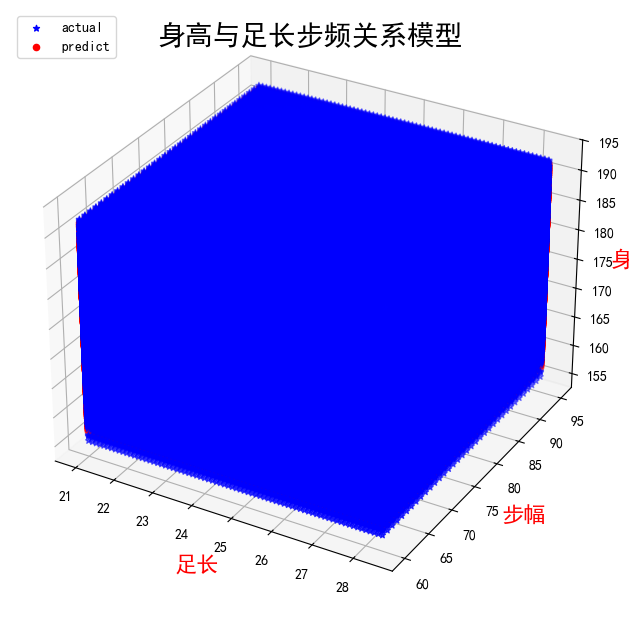

In [ ]:
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置字体

fig = plt.figure(figsize=(8,6))  # 设置画布大小
ax3d = Axes3D(fig) # 创建3D坐标系
fig.add_axes(ax3d) # 将3D坐标系添加到画布中

ax3d.scatter(x1_data,x2_data,y_data,color='b',marker='*',label='actual')  # 绘制实际 
ax3d.scatter(x1_data,x2_data,y_pred,color='r',label='predict') # 绘制预测
ax3d.set_xlabel('足长',color='r',fontsize=16)  # 设置x轴标签
ax3d.set_ylabel('步幅',color='r',fontsize=16)  # 设置y轴标签
ax3d.set_zlabel('身高',color='r',fontsize=16)  # 设置z轴标签

plt.suptitle("身高与足长步频关系模型",fontsize=20)  # 设置标题
plt.legend(loc='upper left') # 显示图例

plt.show() # 显示图形

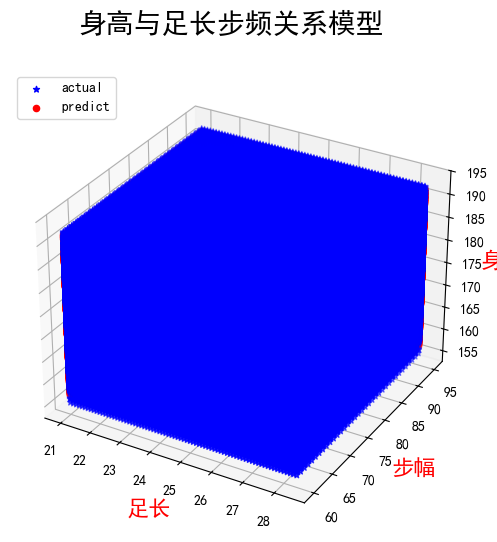

In [ ]:
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置字体

fig = plt.figure(figsize=(8,6))  # 设置画布大小
ax3d = fig.add_subplot(111, projection='3d')

ax3d.scatter(x1_data,x2_data,y_data,color='b',marker='*',label='actual')  # 绘制实际
ax3d.scatter(x1_data,x2_data,y_pred,color='r',label='predict')
ax3d.set_xlabel('足长',color='r',fontsize=16)  # 设置x轴标签
ax3d.set_ylabel('步幅',color='r',fontsize=16)  # 设置y轴标签
ax3d.set_zlabel('身高',color='r',fontsize=16)  # 设置z轴标签

plt.suptitle("身高与足长步频关系模型",fontsize=20)  # 设置标题
plt.legend(loc='upper left') # 设置图例

plt.show()

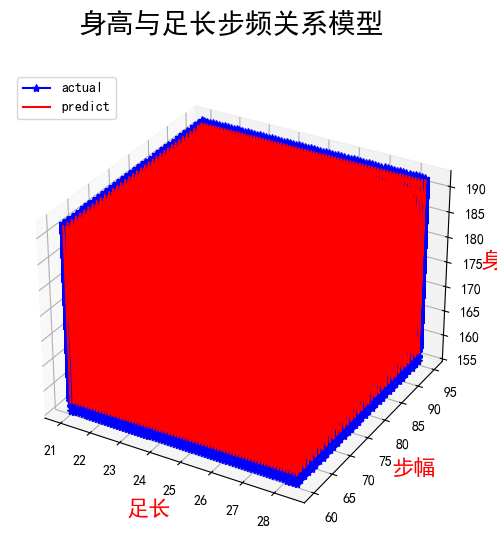

In [ ]:
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置字体

fig = plt.figure(figsize=(8,6))  # 设置画布大小
ax3d = fig.add_subplot(111, projection='3d') # 创建3D图形

ax3d.plot(x1_data,x2_data,y_data,color='b',marker='*',label='actual')  # 绘制实际
ax3d.plot(x1_data,x2_data,y_pred,color='r',label='predict') # 绘制预测
ax3d.set_xlabel('足长',color='r',fontsize=16)  # 设置x轴标签
ax3d.set_ylabel('步幅',color='r',fontsize=16)  # 设置y轴标签
ax3d.set_zlabel('身高',color='r',fontsize=16)  # 设置z轴标签

plt.suptitle("身高与足长步频关系模型",fontsize=20)  # 设置标题
plt.legend(loc='upper left') # 设置图例位置

plt.show() # 显示图形